<a href="https://colab.research.google.com/github/GayathriShrikanth/DeepLearning/blob/master/J046_GayathriShrikanth_DL_Test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gayathri Shrikanth J046**

In [0]:
import pandas
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.optimizers import Adam
from keras import optimizers


In [0]:
iris_data = load_iris()
x = iris_data.data
y_ = iris_data.target.reshape(-1, 1) 
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)

In [0]:
# Split the data for training and testing
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.01)
train_x, X_val, train_y, y_val = train_test_split(train_x, train_y, test_size=0.2, random_state=1)


In [0]:
final_acc={}
final_loss={}
cv_acc={}
cv_loss={}
adam=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
rms=keras.optimizers.RMSprop(lr=0.001, rho=0.9)
sgd=keras.optimizers.SGD(lr=0.001, momentum=0.0, nesterov=False)
ada=keras.optimizers.Adagrad(lr=0.01)
adelta=keras.optimizers.Adadelta(lr=1.0, rho=0.95)
adamax=keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999)
nadam=keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999)
opt=[adam, rms, sgd, ada, adelta, adamax, nadam]
opt_name=["adam", "rms", "sgd", "ada", "adelta", "adamax", "nadam"]
n=0

In [0]:
for optim in opt:
  model = Sequential()
  model.add(Dense(10, input_shape=(4,), activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(3, activation='softmax'))
  model.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])
  # Train the model
  model.fit(train_x, train_y, verbose=2, batch_size=5, epochs=100, validation_data=(test_x, test_y))
  # Test on unseen data
  results = model.evaluate(test_x, test_y)
  final_acc[opt_name[n]]=results[1]
  final_loss[opt_name[n]]=results[0]
  results_cv = model.evaluate(X_val, y_val)
  cv_acc[opt_name[n]]=results_cv[1]
  cv_loss[opt_name[n]]=results_cv[0]
  n=n+1
  print('Final test set loss: {:4f}'.format(results[0]))
  print('Final test set accuracy: {:4f}'.format(results[1]))

Train on 118 samples, validate on 2 samples
Epoch 1/100
 - 3s - loss: 1.0604 - acc: 0.3220 - val_loss: 0.7764 - val_acc: 0.5000
Epoch 2/100
 - 0s - loss: 1.0147 - acc: 0.3305 - val_loss: 0.7830 - val_acc: 0.5000
Epoch 3/100
 - 0s - loss: 0.9888 - acc: 0.3898 - val_loss: 0.7874 - val_acc: 0.5000
Epoch 4/100
 - 0s - loss: 0.9668 - acc: 0.4322 - val_loss: 0.7850 - val_acc: 0.5000
Epoch 5/100
 - 0s - loss: 0.9466 - acc: 0.4322 - val_loss: 0.7843 - val_acc: 0.5000
Epoch 6/100
 - 0s - loss: 0.9258 - acc: 0.4322 - val_loss: 0.7690 - val_acc: 0.5000
Epoch 7/100
 - 0s - loss: 0.9071 - acc: 0.4407 - val_loss: 0.7620 - val_acc: 0.5000
Epoch 8/100
 - 0s - loss: 0.8854 - acc: 0.4661 - val_loss: 0.7465 - val_acc: 0.5000
Epoch 9/100
 - 0s - loss: 0.8656 - acc: 0.4746 - val_loss: 0.7348 - val_acc: 0.5000
Epoch 10/100
 - 0s - loss: 0.8472 - acc: 0.4746 - val_loss: 0.7272 - val_acc: 0.5000
Epoch 11/100
 - 0s - loss: 0.8286 - acc: 0.3559 - val_loss: 0.7119 - val_acc: 0.5000
Epoch 12/100
 - 0s - loss: 0.8

In [0]:
import pandas as pd
print("Accuracy on test")
print(pd.DataFrame([final_acc]))
print("Loss on test")
print(pd.DataFrame([final_loss]))
print("Accuracy on CV")
print(pd.DataFrame([cv_acc]))
print("Loss on CV")
print(pd.DataFrame([cv_loss]))

Accuracy on test
   adam  rms  sgd  ada  adelta  adamax  nadam
0   1.0  1.0  0.5  1.0     0.5     1.0    1.0
Loss on test
      adam       rms       sgd       ada    adelta    adamax     nadam
0  0.16094  0.245479  0.513109  0.527298  0.464898  0.269322  0.222497
Accuracy on CV
   adam  rms       sgd  ada    adelta  adamax  nadam
0   1.0  1.0  0.966667  1.0  0.966667     1.0    1.0
Loss on CV
       adam       rms       sgd       ada   adelta    adamax    nadam
0  0.027141  0.036026  0.067701  0.194133  0.05761  0.040663  0.02346


**Adam is choosen as the best model**

In [0]:
#Hyperparameters
#optimizer-adam
#activation- relu, softmax
#loss='categorical_crossentropy'
#epoches =100

In [0]:
adam=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model = Sequential()
model.add(Dense(10, input_shape=(4,), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
history=model.fit(train_x, train_y, verbose=2, batch_size=5, epochs=100, validation_data=(test_x, test_y))
# Test on unseen data
results_cv = model.evaluate(X_val, y_val)
accuracy_=results_cv[1]
loss_=results_cv[0]
  

Train on 118 samples, validate on 2 samples
Epoch 1/100
 - 3s - loss: 1.1478 - acc: 0.0508 - val_loss: 1.1165 - val_acc: 0.0000e+00
Epoch 2/100
 - 0s - loss: 0.9956 - acc: 0.2712 - val_loss: 1.0746 - val_acc: 0.5000
Epoch 3/100
 - 0s - loss: 0.9500 - acc: 0.4915 - val_loss: 1.0739 - val_acc: 0.5000
Epoch 4/100
 - 0s - loss: 0.9243 - acc: 0.5593 - val_loss: 1.0696 - val_acc: 0.0000e+00
Epoch 5/100
 - 0s - loss: 0.9004 - acc: 0.6525 - val_loss: 1.0507 - val_acc: 0.5000
Epoch 6/100
 - 0s - loss: 0.8746 - acc: 0.6949 - val_loss: 1.0563 - val_acc: 0.5000
Epoch 7/100
 - 0s - loss: 0.8486 - acc: 0.6949 - val_loss: 1.0439 - val_acc: 0.5000
Epoch 8/100
 - 0s - loss: 0.8236 - acc: 0.7458 - val_loss: 1.0255 - val_acc: 0.5000
Epoch 9/100
 - 0s - loss: 0.7947 - acc: 0.8390 - val_loss: 1.0202 - val_acc: 0.5000
Epoch 10/100
 - 0s - loss: 0.7563 - acc: 0.8136 - val_loss: 0.9940 - val_acc: 0.5000
Epoch 11/100
 - 0s - loss: 0.7250 - acc: 0.8051 - val_loss: 0.9625 - val_acc: 1.0000
Epoch 12/100
 - 0s - l

In [0]:
# Summary of neural network
model.summary()

Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_213 (Dense)            (None, 10)                50        
_________________________________________________________________
dense_214 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_215 (Dense)            (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


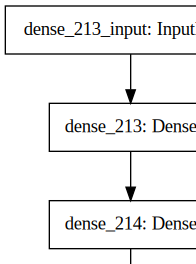

In [0]:
# Output network visualization
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
SVG(model_to_dot(model).create(prog='dot', format='svg'))

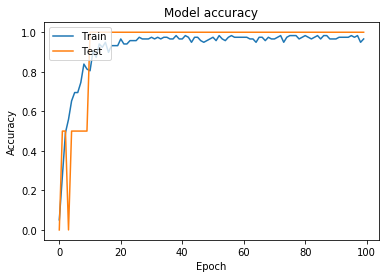

In [0]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


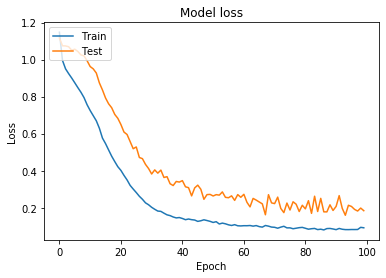

In [0]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()